In [10]:
import pandas as pd
import joblib

import os
import sys
alamat = "/".join(os.getcwd().split("\\")[:-2])
sys.path.append(alamat+'/praproses')
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_excel("data/tweet_bersih_100.xlsx") #data latih yang digunakan tweet_bersih_100.xlsx
twet = df.tweet.tolist()
label = df.label.tolist()
df.head() #menampilkan lima teraatas dari data bersih

,Unnamed: 0,tweet,label
0,0,buka visi misi begitu pukau sehingga buat pres...,positive
1,1,lebih baik pakai teknologi lama kaya negara in...,positive
2,2,kok arguing without menang kokarguing arguingw...,positive
3,3,jalan politik politik satu bukan politik pecah...,positive
4,4,juga fans lihat tampil serang hahaha jugafans ...,negative


negative    500
positive    500
Name: label, dtype: int64


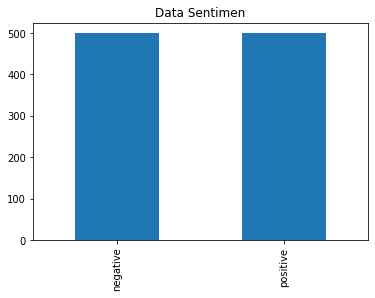

In [12]:
pd.value_counts(df['label']).plot.bar(title='Data Sentimen')
print(pd.value_counts(df['label']))

In [13]:
import numpy as np
from sklearn.model_selection import KFold
from Naive_Bayes_ import naive_bayes_ as nb
X = np.array(twet)
y = np.array(label)

In [ ]:
k = 10
y = np.array(label)
kf = KFold(n_splits=k) #membuat model kfold sejumlah k
kf.get_n_splits(X)


# print(kf)
alpah_list = np.arange(0.1, 10+.1, .1)
rerata = list()
for alpha in alpah_list:
    print(str(alpha), end= "")
    clf = nb.NaiveBayesClassifier(alpha = alpha)
    sc_10 = list()
    for train_index, test_index in kf.split(X):
        print(".", end="")
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.train(X_train, y_train)

        
        y_pred = clf.predict(X_test)
        y_true = y_test
        
        sc = accuracy_score(y_true, y_pred)
        sc_10.append(sc)
#     print( sum(sc_10)/k, "|", alpha)
    rerata.append(sum(sc_10)/k)
    print(sum(sc_10)/k)
dict_ = {
    "alpha":alpah_list,
    "score":rerata
}
df_hasil = pd.DataFrame.from_dict(dict_)
sorted_ = df_hasil.sort_values("score", axis = 0, ascending = False)
sorted_.head()

0.1..........0.768
0.2..........0.7690000000000001
0.30000000000000004..........0.7729999999999999
0.4..........0.778
0.5..........0.776
0.6..........0.7739999999999999
0.7000000000000001..........0.7739999999999999
0.8..........0.7749999999999999
0.9..........0.776
1.0..........0.776
1.1..........0.775
1.2000000000000002..........0.774
1.3000000000000003..........0.772
1.4000000000000001..........0.7710000000000001
1.5000000000000002..........0.768
1.6..........0.767
1.7000000000000002..........0.768
1.8000000000000003..........0.768
1.9000000000000001..........0.7670000000000001
2.0..........0.7659999999999999
2.1..........0.7649999999999999
2.2..........0.7649999999999999
2.3000000000000003..........0.7619999999999999
2.4000000000000004..........0.7609999999999999
2.5000000000000004..........0.7609999999999999
2.6..........0.759
2.7..........0.759
2.8000000000000003..........0.759
2.9000000000000004..........0.759
3.0000000000000004..........0.759
3.1..........0.7579999999999998
3.2

In [ ]:
sorted_.alpha.tolist()[0]

In [ ]:
clf = nb.NaiveBayesClassifier(alpha = sorted_.alpha.tolist()[0])
clf.train(X, y) 
joblib.dump(clf,"model/naive_bayes.m")

In [ ]:
x = clf.predict(X)

In [ ]:
ixx = 0
labelA = list()
labelP= list()

for i, j in zip(label, x):
    if i !=j:
        print(ixx)
        print(j)
        print("label asli",i)
        print(twet[ixx])
        print()
    ixx+=1